In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Drop duplicates
city_data = city_data.drop_duplicates("city", keep="first")

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data,city_data, on="city", how="left")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

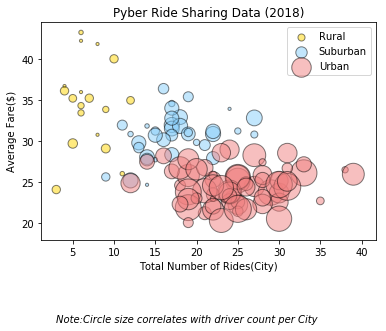

In [4]:
# Create DFs of different type locales
rural_df = pyber_data.loc[(pyber_data["type"] == "Rural")]
suburban_df = pyber_data.loc[(pyber_data["type"] == "Suburban")]
urban_df = pyber_data.loc[(pyber_data["type"] == "Urban")]

# Avg. Fare, Total Rides, and Total Drivers for Rural areas
rur_fare = rural_df.groupby(["city"])["fare"].mean()
rur_rides = rural_df.groupby(["city"]).count()["ride_id"]
rur_drivers = rural_df.groupby(["city"]).mean()["driver_count"]

# Avg. Fare, Total Rides, and Total Drivers for Suburban areas
sub_fare = suburban_df.groupby(["city"])["fare"].mean()
sub_rides = suburban_df.groupby(["city"]).count()["ride_id"]
sub_drivers = suburban_df.groupby(["city"]).mean()["driver_count"]

#Avg. Fare, Total Rides, and Total Drivers for Urban areas
urb_fare = urban_df.groupby(["city"])["fare"].mean()
urb_rides = urban_df.groupby(["city"]).count()["ride_id"]
urb_drivers = urban_df.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(rur_rides, rur_fare, s=rur_drivers*10, marker="o", facecolors="gold", edgecolors="black", alpha=0.5, linewidths=1, label="Rural")

plt.scatter(sub_rides, sub_fare, s=sub_drivers*10, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.5, linewidths=1, label="Suburban")

plt.scatter(urb_rides, urb_fare, s=urb_drivers*10, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.5, linewidths=1, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides(City)")
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(3, 8, "Note:Circle size correlates with driver count per City", style="italic")

# Save Figure
plt.savefig("Pyber Data.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

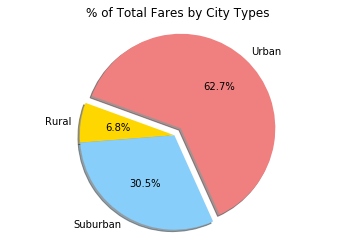

In [4]:
# Calculate City Type Fare
tot_fare = pyber_data.groupby(["type"])["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.title("% of Total Fares by City Types")
plt.pie(tot_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Fares by City Type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

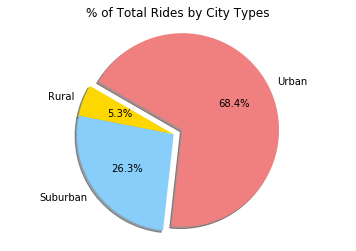

In [6]:
# Calculate Rides by City Type
tot_rides = pyber_data.groupby(["type"])["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.title("% of Total Rides by City Types")
plt.pie(tot_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Rides by City Type.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

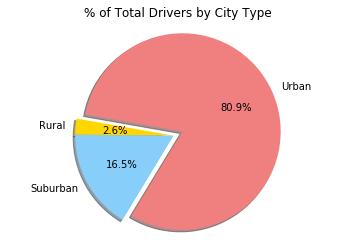

In [8]:
# Calculate Total Drivers by City Type
tot_drivers = city_data.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.title("% of Total Drivers by City Type")
plt.pie(tot_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Drivesr by City Type.png")

In [37]:
# Show Figure
plt.show()